In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, plot, iplot, init_notebook_mode
import plotly.express as px
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
data = pd.read_csv("..\\assets\\data\\Student Stress Factors.csv")

In [5]:
scaler = StandardScaler()
scaler.fit(data.drop('academic performance', axis=1))
df_normalizado = scaler.transform(data.drop('academic performance', axis=1))
df_normalizado

array([[-0.1138469 , -0.94899385,  0.91170283, -0.46462824,  0.09214761],
       [ 0.7969283 , -0.94899385,  0.18234057,  0.21595397, -0.64503328],
       [-1.0246221 , -0.94899385, -1.27638396,  0.89653619,  0.8293285 ],
       ...,
       [-1.0246221 ,  0.65580876, -1.27638396,  1.57711841, -0.64503328],
       [-0.1138469 ,  1.45821006,  1.64106509, -0.46462824,  1.56650939],
       [ 1.7077035 , -0.94899385,  1.64106509,  1.57711841,  0.8293285 ]])

In [6]:
df_param = pd.DataFrame(df_normalizado, columns=data.drop('academic performance', axis=1).columns)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_param, data['academic performance'], test_size=0.25, random_state=1)

In [8]:

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

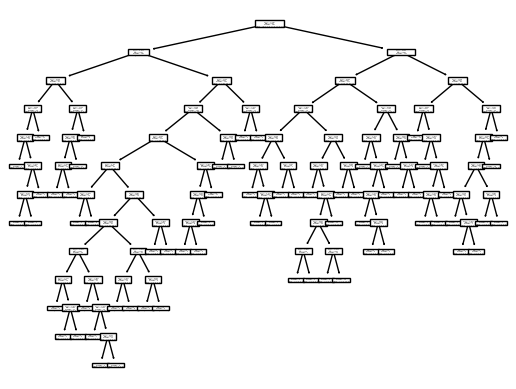

In [9]:
fig, ax = plt.subplots()
tree.plot_tree(clf)
plt.show(5)

In [10]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[10,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0],
       [ 0,  0, 42,  1,  0],
       [ 0,  0,  0, 45,  0],
       [ 0,  0,  2,  0, 17]], dtype=int64)

In [11]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        13
           3       0.95      0.98      0.97        43
           4       0.98      1.00      0.99        45
           5       1.00      0.89      0.94        19

    accuracy                           0.98       130
   macro avg       0.99      0.97      0.98       130
weighted avg       0.98      0.98      0.98       130



In [29]:
data2 = pd.read_csv("..\\assets\\data\\performance_data_Index_convertido_por_faixas.csv")

In [30]:
data.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Sleep Quality                        520 non-null    int64
 1   suffer headaches                     520 non-null    int64
 2   academic performance                 520 non-null    int64
 3   study load                           520 non-null    int64
 4   practice extracurricular activities  520 non-null    int64
 5   stress levels                        520 non-null    int64
dtypes: int64(6)
memory usage: 24.5 KB


In [31]:
scaler = StandardScaler()
scaler.fit(data.drop('academic performance', axis=1))
df_normalizado = scaler.transform(data.drop('academic performance', axis=1))
df_normalizado

array([[-0.1138469 , -0.94899385,  0.91170283, -0.46462824,  0.09214761],
       [ 0.7969283 , -0.94899385,  0.18234057,  0.21595397, -0.64503328],
       [-1.0246221 , -0.94899385, -1.27638396,  0.89653619,  0.8293285 ],
       ...,
       [-1.0246221 ,  0.65580876, -1.27638396,  1.57711841, -0.64503328],
       [-0.1138469 ,  1.45821006,  1.64106509, -0.46462824,  1.56650939],
       [ 1.7077035 , -0.94899385,  1.64106509,  1.57711841,  0.8293285 ]])

In [32]:
df_param = pd.DataFrame(df_normalizado, columns=data.drop('academic performance', axis=1).columns)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df_param, data['academic performance'], test_size=0.25, random_state=1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

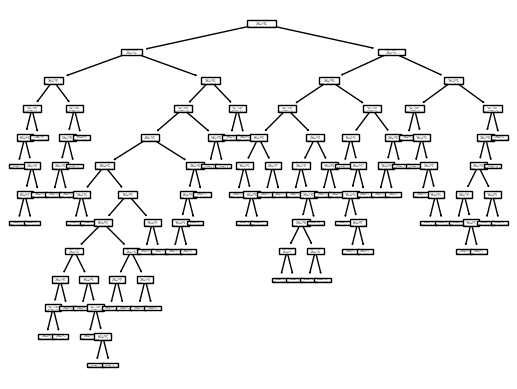

In [34]:
fig, ax = plt.subplots()
tree.plot_tree(clf)
plt.show(5)

In [35]:
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        13
           3       0.95      0.98      0.97        43
           4       0.98      1.00      0.99        45
           5       1.00      0.89      0.94        19

    accuracy                           0.98       130
   macro avg       0.99      0.97      0.98       130
weighted avg       0.98      0.98      0.98       130



In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
# Criando o heatmap
sns.heatmap(confusion_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()